<div style="text-align: center"><font align='/center;' color='dark' face='arial' size=5> PROYECTO 4.</font>

<div style="text-align: justify">El presente proyecto amplía la versión de nuestro proyecto anterior, en el cual tomaremos como modelo benchmark  nuestro modelo seleccionado anteriormente, en este caso nuestro modelo PROPHET, para ello entrenaremos una de red neuronal y a su vez responderemos preguntas adicionales surgidas a lo largo del desarrollo del anterior proyecto.

A continuación profundizaremos en todas las caracteristicas de la autopista illia, para ello tomaremos una copia de nuestro actual dataset, para luego continuar con nuestro entrenamiento de otros modelos tomando como benchmark nuestro mejor modelo del anterior proyecto.

Para este proceso intentaremos responder preguntas como;

***-¿Cúales son las formas de pago más utilizadas?***

***-¿Los patrones y tendencias son similares entre una y otra forma de pago?***

***¿Cúal es el día más transitado ?***

PREGUNTAS A RESPONDER CON EL ENTRENAMIENTO A LOS MODELOS.

***-¿Que pasaria si entrenamos nuestro modelo benchmark tomando las 2 formas de pago más utilizadas?. ¿Mejoraria nuestro modelo benchmark?***

***-¿Mejorara nuestra red neuronal comparado con nuestro benchamark del paso anterior?***


Tambien puede ver nuestro proyecto en nuestro repositorio en github.
https://github.com/JesusA2020/Serie-temporal-con-red-neuronal-LSTM

In [362]:
#Cargamos las librerias a utilizar.
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import datetime
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
#plt.style.use('fivethirtyeight') # For plots
# statistics
from statsmodels.distributions.empirical_distribution import ECDF
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import holidays
import random
import matplotlib.pyplot as plt
import tensorflow as tf
layers = tf.keras.layers

from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils, plot_model
import sklearn.metrics as metrics
import warnings
warnings.simplefilter("ignore")
#LSTM
#%tensorflow_version 2.x
from keras.regularizers import L1L2
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras import optimizers

Funciones creadas a utilizar.

In [462]:
#Creamos nuestra funcion para sacar nuestra métrica MAPE
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [363]:
#Cargamos los dataset a utilizar.
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [364]:
dataset = pd.concat([data_2019, data_2018, data_2017])
dataset

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16
...,...,...,...,...,...,...,...,...,...,...
1372640,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,3
1372641,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Liviano,TELEPASE,10
1372642,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Pesado,TELEPASE,1
1372643,2017,2017-12-31,23,0,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,1


In [365]:
#Modificamos valores de fechas para poder trabajar con ellos
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')
dataset.drop(columns=['fecha','hora_fin'], inplace = True)
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True)

dataset.head()

,periodo,hora_inicio,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,2019,0,Martes,Alberti,Centro,Liviano,NO COBRADO,22,2019-01-01 01:00:00
1,2019,0,Martes,Alberti,Centro,Liviano,TELEPASE,6,2019-01-01 01:00:00
2,2019,0,Martes,Alberti,Provincia,Liviano,NO COBRADO,53,2019-01-01 01:00:00
3,2019,0,Martes,Alberti,Provincia,Liviano,TELEPASE,18,2019-01-01 01:00:00
4,2019,0,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16,2019-01-01 01:00:00


In [366]:
# Extraemos datos para poder realizar gráficas mas detalladas.
dataset['date'] = dataset.fecha
dataset['hora'] = dataset.date.dt.hour
dataset['dia'] = dataset.date.dt.day
dataset['semana'] = dataset.date.dt.isocalendar().week
dataset['mes'] = dataset.date.dt.month
dataset['año']=dataset.date.dt.year
dataset=dataset.drop(columns='fecha')
# agregando nueva variable.
dataset['cantidad_autos/forma_pago'] = dataset['cantidad_pasos']/len(dataset['forma_pago'].unique())


A continuación retomamos los datos iniciales para ser usados en nuestro entrenamiento de red neuronal.

In [367]:

#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia, en este caso no filtraremos tipo de pago, ya que exploraremos cual es la forma de pago predominante
mask = dataset.estacion=='Illia'
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
19,2019-01-01,1,Martes,Centro,Liviano,NO COBRADO,146
20,2019-01-01,1,Martes,Centro,Liviano,TELEPASE,59
21,2019-01-01,1,Martes,Centro,Pesado,TELEPASE,1
22,2019-01-01,1,Martes,Provincia,Liviano,NO COBRADO,147
23,2019-01-01,1,Martes,Provincia,Liviano,TELEPASE,106


In [368]:
#Cargaremos archivos para entrenar nuestra red neuronal
entrenamiento_red_neuronal= pd.concat([data_2019, data_2018, data_2017])
entrenamiento_red_neuronal

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16
...,...,...,...,...,...,...,...,...,...,...
1372640,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,3
1372641,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Liviano,TELEPASE,10
1372642,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Pesado,TELEPASE,1
1372643,2017,2017-12-31,23,0,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,1


In [369]:
#Hacedmos filtrado de datos.
mask =  np.logical_and(entrenamiento_red_neuronal.estacion=='Illia', entrenamiento_red_neuronal.forma_pago == 'EFECTIVO')
entrenamiento_red_neuronal = entrenamiento_red_neuronal[mask]

entrenamiento_red_neuronal.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
80,2019,2019-01-01,1,2,Martes,Illia,Centro,Liviano,EFECTIVO,537
86,2019,2019-01-01,1,2,Martes,Illia,Centro,Pesado,EFECTIVO,1
88,2019,2019-01-01,1,2,Martes,Illia,Provincia,Liviano,EFECTIVO,443
94,2019,2019-01-01,1,2,Martes,Illia,Provincia,Pesado,EFECTIVO,1
149,2019,2019-01-01,2,3,Martes,Illia,Centro,Liviano,EFECTIVO,769


Regresamos a nuestro primer dataset para hacer algunas exploraciones a nuestro dataset.

In [446]:
#Hacemos una copia del dataset original, para trabajar con la copia
dataset_copy=dataset.copy()

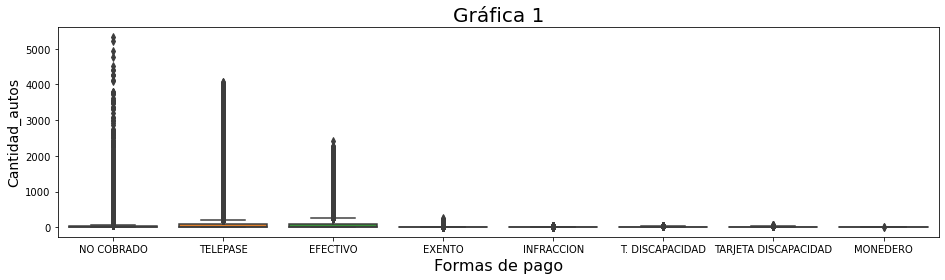

In [447]:
fig = plt.figure(figsize=(38,4))
ax1 = fig.add_subplot(1,3,1)


ax1=sns.boxplot(data=dataset_copy, x='forma_pago',y="cantidad_pasos",ax=ax1)


ax1.set_title('Gráfica 1', fontsize=20)
ax1.set_xlabel('Formas de pago', fontsize=16)
ax1.set_ylabel('Cantidad_autos',fontsize=14)


fig.tight_layout()
plt.show()

Si bien los gráficos son ilustrativos, no podemos concluir si la forma de pago NO COBRADO es de las más utilizadas, para ello haremos un agrupamiento para ver el comportamiento real en numeros.

In [372]:
df=dataset_copy.groupby('forma_pago')['cantidad_pasos'].describe()
df.sort_values('count', inplace = True)
df

,count,mean,std,min,25%,50%,75%,max
forma_pago,,,,,,,,
MONEDERO,14.0,1.142857,0.363137,1.0,1.0,1.0,1.0,2.0
T. DISCAPACIDAD,17139.0,7.050703,5.264167,1.0,2.0,6.0,11.0,32.0
TARJETA DISCAPACIDAD,41336.0,9.473582,8.664865,1.0,2.0,7.0,15.0,54.0
NO COBRADO,66679.0,34.918640,146.416643,1.0,2.0,7.0,26.0,5330.0
INFRACCION,78000.0,4.369346,4.605011,1.0,1.0,3.0,6.0,49.0
EXENTO,105903.0,6.067090,6.856916,1.0,2.0,4.0,8.0,262.0
TELEPASE,204612.0,246.936045,559.473844,1.0,2.0,10.0,87.0,4077.0
EFECTIVO,238869.0,200.384232,403.246904,1.0,2.0,11.0,104.0,2416.0


<div style="text-align: justify">Agrupando de esta forma los datos podemos visualizar que las formas de pago más utilizadas son efectivo y telepase, y aunque en nuestra gráfica se puede apreciar que NO COBRADO pareciera ser la forma de pago predominante, podemos ver que es de las formas de pago con mayor desviación estandar, es por ello que sus datos se encuentran dispersos y en la gráfica se puede llegar a una conclusión errónea. Tambien podemos concluir, que las formas de pago más utilizadas son Telepase y Efectivo. De esta forma damos por resulta nuestra primer interrogante.

Procederemos a utilizar, las 2 formas de pago más frecuentes y con ello determinar si siguen el mismo patrón o difieren.

In [448]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_copy['fecha2'] = pd.to_datetime(dataset_copy.fecha) + pd.to_timedelta(dataset_copy.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_copy.drop(columns=['fecha','hora_fin'], inplace = True)

dataset_copy.head()

,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha2
19,Martes,Centro,Liviano,NO COBRADO,146,2019-01-01 01:00:00
20,Martes,Centro,Liviano,TELEPASE,59,2019-01-01 01:00:00
21,Martes,Centro,Pesado,TELEPASE,1,2019-01-01 01:00:00
22,Martes,Provincia,Liviano,NO COBRADO,147,2019-01-01 01:00:00
23,Martes,Provincia,Liviano,TELEPASE,106,2019-01-01 01:00:00


In [449]:
#Corregimos el nombre de fecha2 a fecha
dataset_copy.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
19,2019-01-01,1,Martes,Centro,Liviano,NO COBRADO,146
20,2019-01-01,1,Martes,Centro,Liviano,TELEPASE,59
21,2019-01-01,1,Martes,Centro,Pesado,TELEPASE,1
22,2019-01-01,1,Martes,Provincia,Liviano,NO COBRADO,147
23,2019-01-01,1,Martes,Provincia,Liviano,TELEPASE,106


In [450]:
dataset_copy.sort_values('fecha', inplace = True)
dataset_copy.reset_index(drop=True, inplace = True)
dataset_copy

,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,Domingo,Centro,Liviano,TELEPASE,459,2017-01-01 00:00:00
1,Domingo,Provincia,Pesado,TELEPASE,3,2017-01-01 00:00:00
2,Domingo,Provincia,Pesado,EFECTIVO,1,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,TELEPASE,7,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,EFECTIVO,6,2017-01-01 00:00:00
...,...,...,...,...,...,...
752547,Martes,Centro,Liviano,TELEPASE,122,2019-12-31 23:00:00
752548,Martes,Centro,Liviano,NO COBRADO,3,2019-12-31 23:00:00
752549,Martes,Centro,Liviano,INFRACCION,4,2019-12-31 23:00:00
752550,Martes,Centro,Liviano,EXENTO,1,2019-12-31 23:00:00


In [451]:
#Procedemos a filtrar, las dos formas de pago más importantes para entrenarlo
mask =  np.logical_or(dataset_copy.forma_pago=='TELEPASE', dataset_copy.forma_pago == 'EFECTIVO')
dataset_copy = dataset_copy[mask]

dataset_copy.head()

,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,Domingo,Centro,Liviano,TELEPASE,459,2017-01-01
1,Domingo,Provincia,Pesado,TELEPASE,3,2017-01-01
2,Domingo,Provincia,Pesado,EFECTIVO,1,2017-01-01
3,Domingo,Provincia,Pesado,TELEPASE,7,2017-01-01
4,Domingo,Provincia,Pesado,EFECTIVO,6,2017-01-01


In [452]:
#Hacemos one hot enconding, para variables a estudiar.
df_dummies= pd.get_dummies(dataset_copy['tipo_vehiculo'])
df_dummies2= pd.get_dummies(dataset_copy['sentido'])
df_dummies3=pd.get_dummies(dataset_copy['forma_pago'])
df_new = pd.concat([dataset_copy, df_dummies,df_dummies2,df_dummies3], axis=1)
del df_new['tipo_vehiculo']
del df_new['sentido']
del df_new['forma_pago']
df_new['T_liviano']=df_new['Liviano']*df_new['cantidad_pasos']
df_new['T_pesado']=df_new['Pesado']*df_new['cantidad_pasos']
df_new['T_centro']=df_new['Centro']*df_new['cantidad_pasos']
df_new['T_provincia']=df_new['Provincia']*df_new['cantidad_pasos']
df_new['T_TELEPASE']=df_new['TELEPASE']*df_new['cantidad_pasos']
df_new['T_EFECTIVO']=df_new['EFECTIVO']*df_new['cantidad_pasos']

del df_new['Liviano']
del df_new['Pesado']
del df_new['Centro']
del df_new['Provincia']
del df_new['TELEPASE']
del df_new['EFECTIVO']

df_new

,dia,cantidad_pasos,fecha,T_liviano,T_pesado,T_centro,T_provincia,T_TELEPASE,T_EFECTIVO
0,Domingo,459,2017-01-01 00:00:00,459,0,459,0,459,0
1,Domingo,3,2017-01-01 00:00:00,0,3,0,3,3,0
2,Domingo,1,2017-01-01 00:00:00,0,1,0,1,0,1
3,Domingo,7,2017-01-01 00:00:00,0,7,0,7,7,0
4,Domingo,6,2017-01-01 00:00:00,0,6,0,6,0,6
...,...,...,...,...,...,...,...,...,...
752541,Martes,1,2019-12-31 23:00:00,0,1,0,1,1,0
752542,Martes,110,2019-12-31 23:00:00,110,0,0,110,110,0
752546,Martes,190,2019-12-31 23:00:00,190,0,0,190,0,190
752547,Martes,122,2019-12-31 23:00:00,122,0,122,0,122,0


In [453]:
#Resampleamos
diario=df_new.resample('D', on='fecha').sum()
diario
diario.describe()


,cantidad_pasos,T_liviano,T_pesado,T_centro,T_provincia,T_TELEPASE,T_EFECTIVO
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,89855.396347,86419.106849,3436.289498,46697.675799,43157.720548,46142.536986,43712.859361
std,20594.726831,19515.413272,1372.420686,10732.339502,10108.211067,15514.989022,8192.736927
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72269.500000,70106.500000,2401.000000,37483.500000,35346.000000,31793.500000,39061.500000
50%,97897.000000,93836.000000,3801.000000,51175.000000,46720.000000,49868.000000,43761.000000
75%,105722.500000,101458.000000,4611.500000,54856.000000,51024.000000,59688.500000,49498.000000
max,119674.000000,114730.000000,5932.000000,64369.000000,58075.000000,69329.000000,63127.000000


Con la anterior tabla, visualizamos los valores que estan fuera de la media para asi poder determinar el valor minimo de nuestras mascaras, guiandonos principalmente por la columna cantidad_pasos.

Procederemos a utilizar técnica intercuartil para el filtrado de valores outliers, es importante comentar esto, ya que en el proyecto anterior solo se hizo el análisis empirico de la cantidad de autos mas baja guiandonos de la media. No obstante en este caso utilizaremos el rango intercuartil

In [454]:
#Fitramos por rango intercuartil, tra

for i, caracteristicas in enumerate(['cantidad_pasos', 'T_TELEPASE','T_EFECTIVO']):
    q25,q75 = np.nanpercentile(diario[caracteristicas], [25,75])
    iqr = q75 - q25
    minimo = q25 - 1.5*iqr
    maximo = q75 + 1.5*iqr
    
    mascara_outliers = ((diario[caracteristicas] < minimo) | (diario[caracteristicas]> maximo))
    diario[mascara_outliers]=np.NaN
#Hacemos interpolación de los datos para los valores faltantes.    
diario.cantidad_pasos=diario.cantidad_pasos.interpolate()
diario.T_TELEPASE=diario.T_TELEPASE.interpolate()
diario.T_EFECTIVO=diario.T_EFECTIVO.interpolate()
diario

,cantidad_pasos,T_liviano,T_pesado,T_centro,T_provincia,T_TELEPASE,T_EFECTIVO
fecha,,,,,,,
2017-01-01,43509.0,42577.0,932.0,24024.0,19485.0,12326.0,31183.0
2017-01-02,87189.0,82228.0,4961.0,47142.0,40047.0,35621.0,51568.0
2017-01-03,90483.0,85219.0,5264.0,49085.0,41398.0,39390.0,51093.0
2017-01-04,93626.0,88351.0,5275.0,50834.0,42792.0,40294.0,53332.0
2017-01-05,97859.0,92300.0,5559.0,53564.0,44295.0,41373.0,56486.0
...,...,...,...,...,...,...,...
2019-12-27,97217.0,94779.0,2438.0,51333.0,45884.0,57035.0,40182.0
2019-12-28,59664.0,58433.0,1231.0,31239.0,28425.0,28983.0,30681.0
2019-12-29,48836.0,48055.0,781.0,25975.0,22861.0,22577.0,26259.0


In [455]:
df_entrenamiento=diario.copy()
df_entrenamiento

,cantidad_pasos,T_liviano,T_pesado,T_centro,T_provincia,T_TELEPASE,T_EFECTIVO
fecha,,,,,,,
2017-01-01,43509.0,42577.0,932.0,24024.0,19485.0,12326.0,31183.0
2017-01-02,87189.0,82228.0,4961.0,47142.0,40047.0,35621.0,51568.0
2017-01-03,90483.0,85219.0,5264.0,49085.0,41398.0,39390.0,51093.0
2017-01-04,93626.0,88351.0,5275.0,50834.0,42792.0,40294.0,53332.0
2017-01-05,97859.0,92300.0,5559.0,53564.0,44295.0,41373.0,56486.0
...,...,...,...,...,...,...,...
2019-12-27,97217.0,94779.0,2438.0,51333.0,45884.0,57035.0,40182.0
2019-12-28,59664.0,58433.0,1231.0,31239.0,28425.0,28983.0,30681.0
2019-12-29,48836.0,48055.0,781.0,25975.0,22861.0,22577.0,26259.0


In [456]:
d_hora=diario.copy()
d_hora=diario.reset_index(level=['fecha'])
d_hora=d_hora.resample('H', on='fecha').sum()
d_hora

,cantidad_pasos,T_liviano,T_pesado,T_centro,T_provincia,T_TELEPASE,T_EFECTIVO
fecha,,,,,,,
2017-01-01 00:00:00,43509.0,42577.0,932.0,24024.0,19485.0,12326.0,31183.0
2017-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2019-12-30 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-30 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-30 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


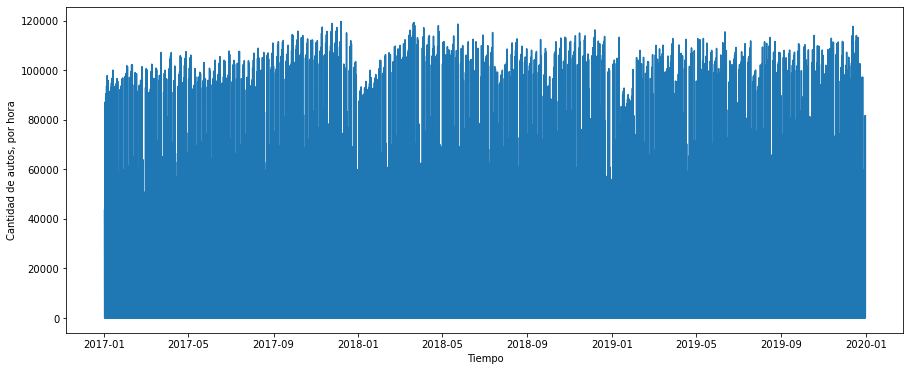

In [457]:
#Gráfica de todas las formas de pago
plt.figure(figsize = (15,6))
plt.plot(d_hora.index, d_hora.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

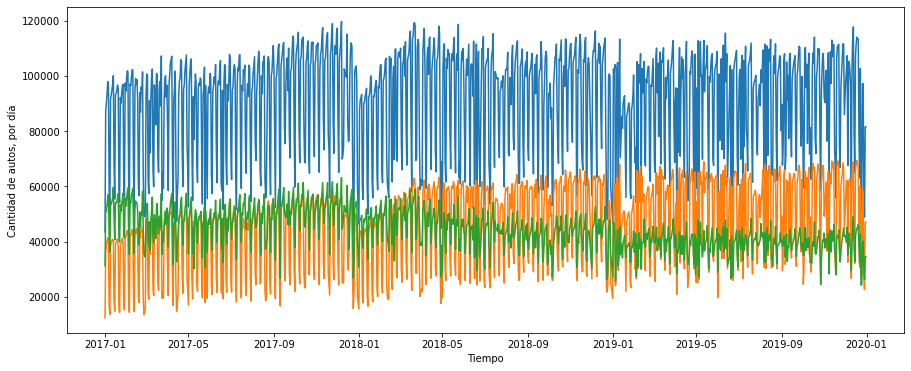

In [458]:
#Gráfica de todas las formas de pago
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.plot(diario.index, diario.T_TELEPASE)
plt.plot(diario.index, diario.T_EFECTIVO)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por día')
plt.show()

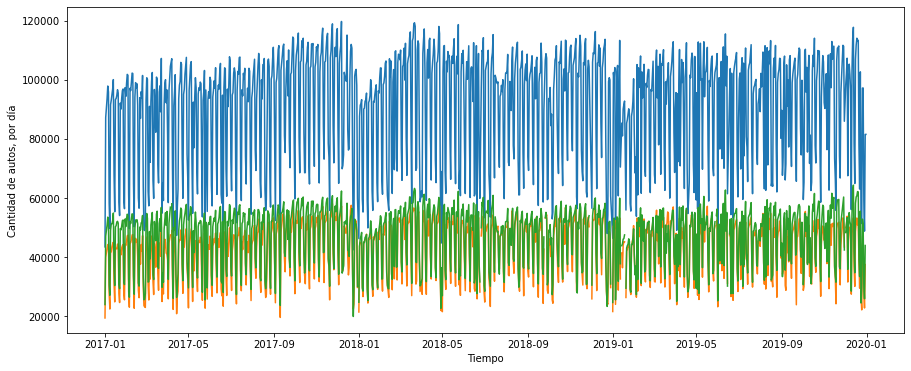

In [459]:
#Gráfica de todos los sentidos
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.plot(diario.index, diario.T_provincia)
plt.plot(diario.index, diario.T_centro)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por día')
plt.show()

Podemos ver que la tendencia entre los dos tipos de sentido tienden a valores similares, y por ende consideramos que no hay valores atípicos que puedan marcar una diferencia en las predicciones de valores.

Con la gráfica anterior podemos dar por concluida la segunda pregunta, respondiendonos que los patrones entre las 2 formas de pago más frecuentes no comparten la misma tendencia, ya que telepase tiene una tendencia similar a la cantidad total de autos, mientras que el efectivo tiene una tendencia a la baja, con ello podemos responder dudas anteriormente inconclusas, llegando a la conclusión que hay una relación muy estrecha entre la disminución del uso de efectivo y el aumento de telepase.

¿Cúal es el día más transitado de la semana?

In [386]:
#Utilizaremos el datset principal para determinar el día mas transitado
dia=dataset.copy()
dia

,fecha,hora_fin,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
19,2019-01-01,1,Martes,Centro,Liviano,NO COBRADO,146
20,2019-01-01,1,Martes,Centro,Liviano,TELEPASE,59
21,2019-01-01,1,Martes,Centro,Pesado,TELEPASE,1
22,2019-01-01,1,Martes,Provincia,Liviano,NO COBRADO,147
23,2019-01-01,1,Martes,Provincia,Liviano,TELEPASE,106
...,...,...,...,...,...,...,...
1372324,2017-12-31,23,Domingo,Provincia,Pesado,EFECTIVO,1
1372325,2017-12-31,23,Domingo,Provincia,Pesado,TELEPASE,2
1372326,2017-12-31,23,Domingo,Provincia,Pesado,EFECTIVO,1
1372327,2017-12-31,0,Domingo,Provincia,Liviano,NO COBRADO,99


In [387]:
#Evaluamos cuales son nuestros valores unicos de dias.
dia.dia.unique()

array(['Martes', 'Viernes', 'Lunes', 'Miércoles', 'Sábado', 'Jueves',
       'Domingo'], dtype=object)

In [388]:
#Hacemos un mapeo para poder gráficar de mejor forma.
dia['dia_2'] = dia['dia'].map({'Domingo':1,'Lunes':2,'Martes':3,'Miércoles':4,'Jueves':5,'Viernes':6,'Sábado':7})
dia

,fecha,hora_fin,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,dia_2
19,2019-01-01,1,Martes,Centro,Liviano,NO COBRADO,146,3
20,2019-01-01,1,Martes,Centro,Liviano,TELEPASE,59,3
21,2019-01-01,1,Martes,Centro,Pesado,TELEPASE,1,3
22,2019-01-01,1,Martes,Provincia,Liviano,NO COBRADO,147,3
23,2019-01-01,1,Martes,Provincia,Liviano,TELEPASE,106,3
...,...,...,...,...,...,...,...,...
1372324,2017-12-31,23,Domingo,Provincia,Pesado,EFECTIVO,1,1
1372325,2017-12-31,23,Domingo,Provincia,Pesado,TELEPASE,2,1
1372326,2017-12-31,23,Domingo,Provincia,Pesado,EFECTIVO,1,1
1372327,2017-12-31,0,Domingo,Provincia,Liviano,NO COBRADO,99,1


Text(0.5, 21.706249999999983, 'Días')

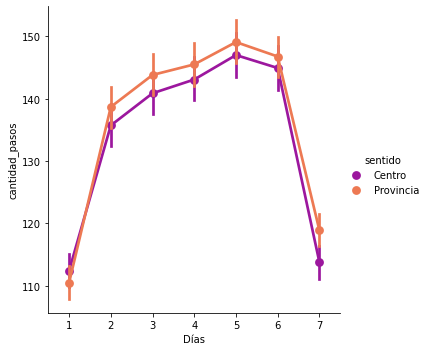

In [461]:
#Gráficas de manera mas precisa para una correcta visualización 
sns.factorplot(data = dia, x = 'dia_2', y = "cantidad_pasos", 
               #col = 'sentido',
               palette = 'plasma',
               hue = 'sentido',
              )
plt.xlabel('Días')

<div style="text-align: justify">En esta parte podemos concluir y responder la última pregunta de la primera parte en la cual vemos que ambos sentidos tienen la misma tendencia diaria asi como casi en similitud de flujo, sin embargo como se ha demostrado claramente, provincia tiene la mayor cantidad de flujo, a su vez podemos concluir que el dia con mayor flujo vehicular para ambos sentidos sorprendemente es el día jueves, menciono sorprendemente ya que a razón de la lógica podriamos determinar que inicios de semana o fines de semana son los dias con mayores flujos, no obstante queda demostrado que el día jueves es el día con mayoría.

<div style="text-align: center"><font align='/center;' color='dark' face='arial' size=5> BENCHMARK.</font>

<div style="text-align: justify">Para esta parte usaremos nuestro mejor modelo elegido anteriormente, no obstante  añadiremos datos para ver si nuestro modelo elegido tiene una mejor performance.

In [390]:
df_entrenamiento

,dia,cantidad_pasos,hora,semana,mes,año,T_liviano,T_pesado,T_centro,T_provincia,T_TELEPASE,T_EFECTIVO
fecha,,,,,,,,,,,,
2017-01-01,372.0,43509.0,4750.0,19344,372.0,750324.0,42577.0,932.0,24024.0,19485.0,12326.0,31183.0
2017-01-02,1108.0,87189.0,6473.0,554,554.0,1117418.0,82228.0,4961.0,47142.0,40047.0,35621.0,51568.0
2017-01-03,1596.0,90483.0,6188.0,532,532.0,1073044.0,85219.0,5264.0,49085.0,41398.0,39390.0,51093.0
2017-01-04,2176.0,93626.0,6451.0,544,544.0,1097248.0,88351.0,5275.0,50834.0,42792.0,40294.0,53332.0
2017-01-05,2805.0,97859.0,6634.0,561,561.0,1131537.0,92300.0,5559.0,53564.0,44295.0,41373.0,56486.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,5184.0,97217.0,2208.0,9984,2304.0,387648.0,94779.0,2438.0,51333.0,45884.0,57035.0,40182.0
2019-12-28,5376.0,59664.0,2208.0,9984,2304.0,387648.0,58433.0,1231.0,31239.0,28425.0,28983.0,30681.0
2019-12-29,5568.0,48836.0,2208.0,9984,2304.0,387648.0,48055.0,781.0,25975.0,22861.0,22577.0,26259.0


Este dataset contiene las dos formas de pago más importantes, y trataremos que mejore las predicciones al modelo anterior.

In [391]:
df=df_entrenamiento.reset_index(level=['fecha'])
df

,fecha,dia,cantidad_pasos,hora,semana,mes,año,T_liviano,T_pesado,T_centro,T_provincia,T_TELEPASE,T_EFECTIVO
0,2017-01-01,372.0,43509.0,4750.0,19344,372.0,750324.0,42577.0,932.0,24024.0,19485.0,12326.0,31183.0
1,2017-01-02,1108.0,87189.0,6473.0,554,554.0,1117418.0,82228.0,4961.0,47142.0,40047.0,35621.0,51568.0
2,2017-01-03,1596.0,90483.0,6188.0,532,532.0,1073044.0,85219.0,5264.0,49085.0,41398.0,39390.0,51093.0
3,2017-01-04,2176.0,93626.0,6451.0,544,544.0,1097248.0,88351.0,5275.0,50834.0,42792.0,40294.0,53332.0
4,2017-01-05,2805.0,97859.0,6634.0,561,561.0,1131537.0,92300.0,5559.0,53564.0,44295.0,41373.0,56486.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2019-12-27,5184.0,97217.0,2208.0,9984,2304.0,387648.0,94779.0,2438.0,51333.0,45884.0,57035.0,40182.0
1091,2019-12-28,5376.0,59664.0,2208.0,9984,2304.0,387648.0,58433.0,1231.0,31239.0,28425.0,28983.0,30681.0
1092,2019-12-29,5568.0,48836.0,2208.0,9984,2304.0,387648.0,48055.0,781.0,25975.0,22861.0,22577.0,26259.0
1093,2019-12-30,5730.0,81524.0,2205.0,191,2292.0,385629.0,79385.0,2139.0,43987.0,37537.0,47001.0,34523.0


Como vimos en una gráfica anterior, utilizaremos más variables que solo la cantidad de autos, para ello determinamos entrenar nuestro modelo con la variable de telepase que es la variable con mayor similitud en tendencia de la cantidad de autos.


In [392]:
#llamamos las columnas que utilizaremos para el entrenamiento
df=df[['fecha','cantidad_pasos','T_TELEPASE']]
df

,fecha,cantidad_pasos,T_TELEPASE
0,2017-01-01,43509.0,12326.0
1,2017-01-02,87189.0,35621.0
2,2017-01-03,90483.0,39390.0
3,2017-01-04,93626.0,40294.0
4,2017-01-05,97859.0,41373.0
...,...,...,...
1090,2019-12-27,97217.0,57035.0
1091,2019-12-28,59664.0,28983.0
1092,2019-12-29,48836.0,22577.0
1093,2019-12-30,81524.0,47001.0


In [393]:
#hacemos una copia para poder hacer visualizacion de como se distribuye nuestro set de entrenamiento y testeo
df2=df.copy()

In [394]:
#Mandamos a llamar solo las columnas que ocuparemos para visualizar de manera correcta 
df2=df2[['fecha','cantidad_pasos']]

In [395]:
split_date = '01-Jun-2019'
pjme_train = df2.loc[df.fecha <= split_date].copy()
pjme_test = df2.loc[df.fecha > split_date].copy()

In [396]:
pjme_train=pjme_train.resample('D', on='fecha').sum()
pjme_test=pjme_test.resample('D', on='fecha').sum()

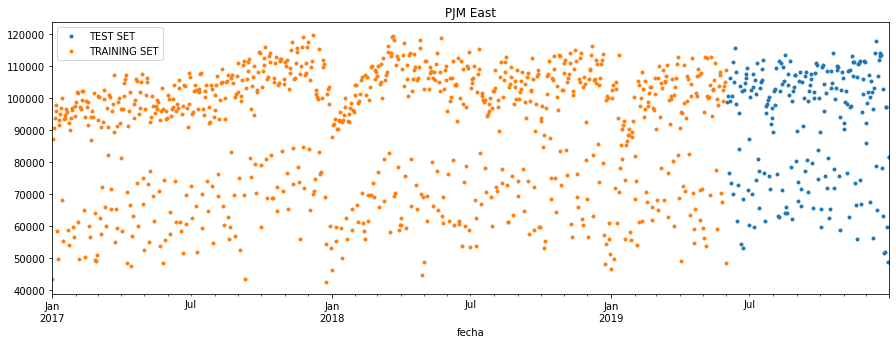

In [397]:
pjme_test \
    .rename(columns={'cantidad_pasos': 'TEST SET'}) \
    .join(pjme_train.rename(columns={'cantidad_pasos': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(15,5), title='PJM East', style='.')
plt.show()

In [398]:
split_date = '01-Jun-2019'
pjme_train = df.loc[df.fecha <= split_date].copy()
pjme_test = df.loc[df.fecha > split_date].copy()

In [399]:
pjme_train=pjme_train.resample('D', on='fecha').sum()
pjme_test=pjme_test.resample('D', on='fecha').sum()

In [400]:
pjme_test=pjme_test.reset_index(level=['fecha'])
pjme_test['ds'] = pjme_test['fecha']
pjme_test['y'] = pjme_test['cantidad_pasos']
pjme_train=pjme_train.reset_index(level=['fecha'])
pjme_train['ds'] = pjme_train['fecha']
pjme_train['y'] = pjme_train['cantidad_pasos']
pjme_train

,fecha,cantidad_pasos,T_TELEPASE,ds,y
0,2017-01-01,43509.0,12326.0,2017-01-01,43509.0
1,2017-01-02,87189.0,35621.0,2017-01-02,87189.0
2,2017-01-03,90483.0,39390.0,2017-01-03,90483.0
3,2017-01-04,93626.0,40294.0,2017-01-04,93626.0
4,2017-01-05,97859.0,41373.0,2017-01-05,97859.0
...,...,...,...,...,...
877,2019-05-28,102473.0,62734.0,2019-05-28,102473.0
878,2019-05-29,103693.0,63339.5,2019-05-29,103693.0
879,2019-05-30,104913.0,63945.0,2019-05-30,104913.0
880,2019-05-31,108818.0,63969.0,2019-05-31,108818.0


In [401]:
pjme_train=pjme_train.resample('D', on='ds').sum()
pjme_test=pjme_test.resample('D', on='ds').sum()

In [402]:
pjme_train=pjme_train.reset_index(level=['ds'])
pjme_test=pjme_test.reset_index(level=['ds'])

In [403]:
holidays= pd.read_csv('holidays.csv')
holidays=holidays.sort_values(by='ds')

In [404]:
holidays

,Unnamed: 0,holiday,ds
0,0,school_holiday,2018-01-01
1,1,school_holiday,2018-02-12
2,2,school_holiday,2018-02-13
3,3,school_holiday,2018-03-24
4,4,school_holiday,2018-03-29
...,...,...,...
43,43,school_holiday,2019-10-12
62,62,school_holiday,2019-10-14
38,38,school_holiday,2019-11-18
39,39,school_holiday,2019-12-08


In [405]:
m=Prophet(daily_seasonality=True, holidays=holidays)
#m.add_regressor('T_TELEPASE')
m.fit(pjme_train)


In [406]:
pjme_train_fcst = m.predict(pjme_train)
pjme_test_fcst = m.predict(pjme_test)

In [408]:
MAPE_train = mean_absolute_percentage_error(pjme_train.cantidad_pasos,pjme_train_fcst.yhat)
MAPE_test = mean_absolute_percentage_error(pjme_test.cantidad_pasos,pjme_test_fcst.yhat)
print(f'errror en train: {MAPE_train}')
print(f'errror en train: {MAPE_test}')

errror en train: 9.58577701797977
errror en train: 13.608699514099182


In [409]:
rmse_train=np.sqrt(mean_squared_error(pjme_train.cantidad_pasos,pjme_train_fcst.yhat))
rmse_test=np.sqrt(mean_squared_error(pjme_test.cantidad_pasos,pjme_test_fcst.yhat))
print(rmse_train)
print(rmse_test)

11558.235648414042
16702.826250103823


In [410]:
forecast = m.predict(pjme_test.drop(columns="y"))
future = m.make_future_dataframe(periods=24 , freq='D')
future.tail()

,ds
901,2019-06-21
902,2019-06-22
903,2019-06-23
904,2019-06-24
905,2019-06-25


Text(40.75, 0.5, 'Cantidad de autos, por día')

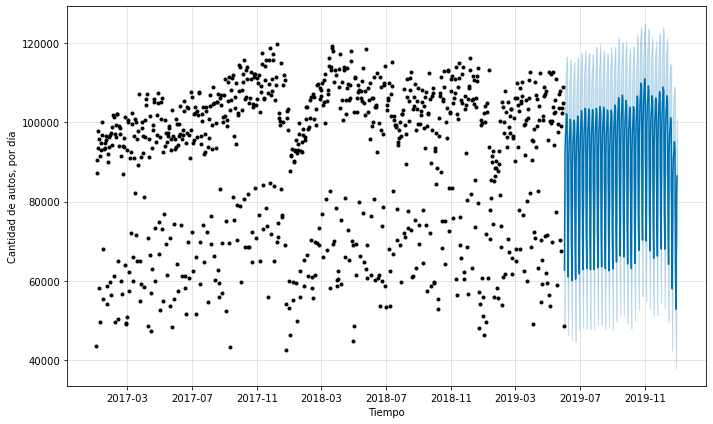

In [463]:
#Visualizamos nuestros resultados del entrenamiento
fig1 = m.plot(forecast)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por día')

In [412]:
pjme_train_fcst = m.predict(pjme_train)
pjme_test_fcst = m.predict(pjme_test)

In [413]:
pjme_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-06-02,55599.735313,48317.876908,78640.698829,55599.735313,55599.735313,7071.905777,7071.905777,7071.905777,34587.263507,...,-27103.710959,-27103.710959,-27103.710959,-411.646771,-411.646771,-411.646771,0.0,0.0,0.0,62671.641090
1,2019-06-03,55594.210505,77539.306691,104988.079629,55594.210505,55594.210505,35696.113170,35696.113170,35696.113170,34587.263507,...,1752.526672,1752.526672,1752.526672,-643.677010,-643.677010,-643.677010,0.0,0.0,0.0,91290.323675
2,2019-06-04,55588.685697,82015.993267,111241.965419,55588.685697,55588.685697,41104.060061,41104.060061,41104.060061,34587.263507,...,7398.595211,7398.595211,7398.595211,-881.798657,-881.798657,-881.798657,0.0,0.0,0.0,96692.745758
3,2019-06-05,55583.160889,84038.632417,114817.497237,55583.160889,55583.160889,43554.682600,43554.682600,43554.682600,34587.263507,...,10090.094277,10090.094277,10090.094277,-1122.675184,-1122.675184,-1122.675184,0.0,0.0,0.0,99137.843490
4,2019-06-06,55577.636081,87704.266823,116769.301720,55577.636081,55577.636081,46598.424433,46598.424433,46598.424433,34587.263507,...,13373.968690,13373.968690,13373.968690,-1362.807764,-1362.807764,-1362.807764,0.0,0.0,0.0,102176.060515


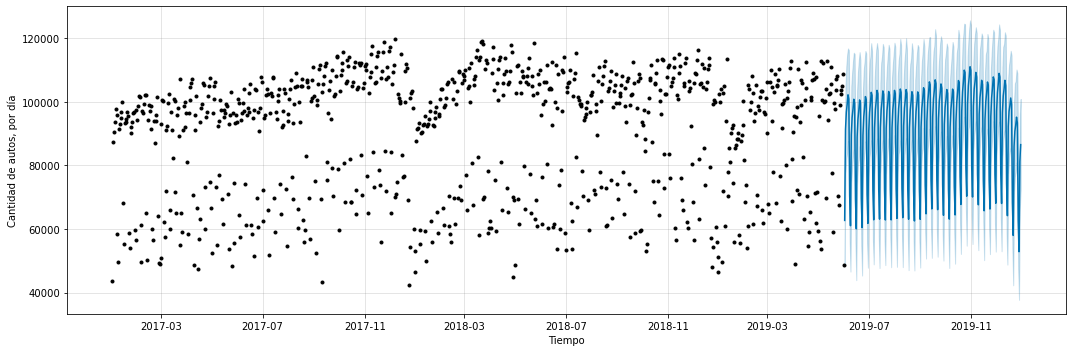

In [464]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = m.plot(pjme_test_fcst,
                 ax=ax)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por día')
plt.show()

Text(85.75, 0.5, 'Cantidad de autos, por día')

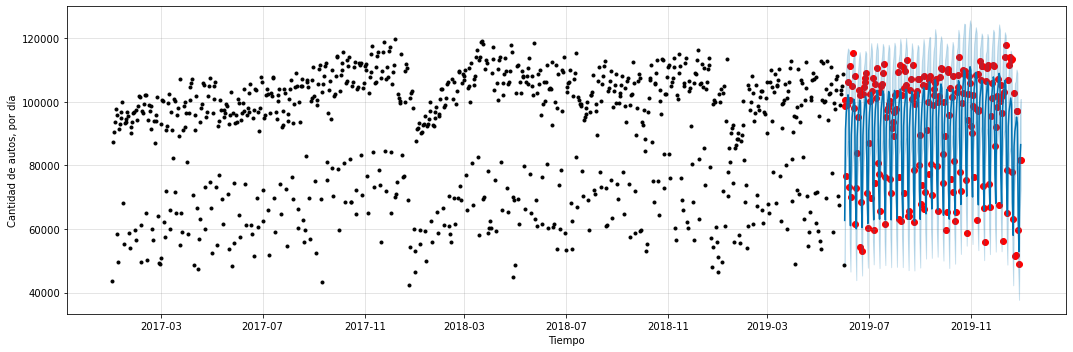

In [465]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test.ds, pjme_test['cantidad_pasos'], color='r')
fig = m.plot(pjme_test_fcst, ax=ax)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por día')

In [416]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='365.25 days', period='30 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 6 forecasts with cutoffs between 2018-01-02 00:00:00 and 2018-06-01 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-01-03,89217.517265,77573.428205,100547.230867,91415.0,2018-01-02
1,2018-01-04,90511.663207,79059.988011,101227.058000,91860.0,2018-01-02
2,2018-01-05,89722.087296,77633.897109,101282.585109,93259.0,2018-01-02
3,2018-01-06,57775.144790,46123.488163,69507.158701,59637.0,2018-01-02
4,2018-01-07,46383.288374,34187.105430,57817.799776,55274.0,2018-01-02


In [417]:
df_p = performance_metrics(df_cv)
df_p.head(100)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,1.644132e+08,12822.369925,9816.394461,0.116426,0.085565,0.691781
1,38 days,1.751329e+08,13233.778712,10082.437753,0.121141,0.087923,0.680365
2,39 days,1.752191e+08,13237.036896,10064.713121,0.121163,0.087870,0.684932
3,40 days,1.766764e+08,13291.965745,10156.477658,0.122329,0.090662,0.684932
4,41 days,1.792146e+08,13387.106964,10257.268810,0.123849,0.091696,0.673516
...,...,...,...,...,...,...,...
95,132 days,1.754542e+08,13245.912387,10031.775774,0.119915,0.089681,0.684932
96,133 days,1.771888e+08,13311.227608,10100.342940,0.120451,0.089963,0.678082
97,134 days,1.699761e+08,13037.488539,9911.853695,0.117632,0.089681,0.678082
98,135 days,1.645568e+08,12827.968891,9788.916945,0.115634,0.088947,0.680365


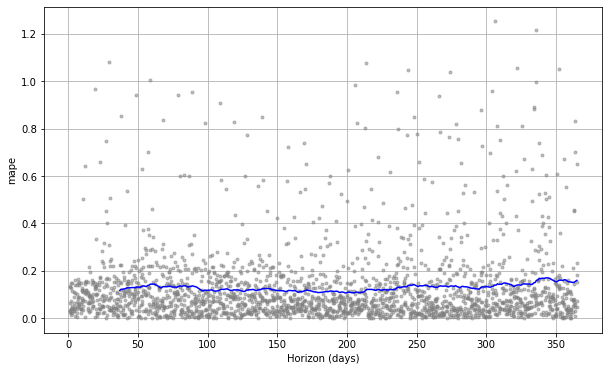

In [418]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

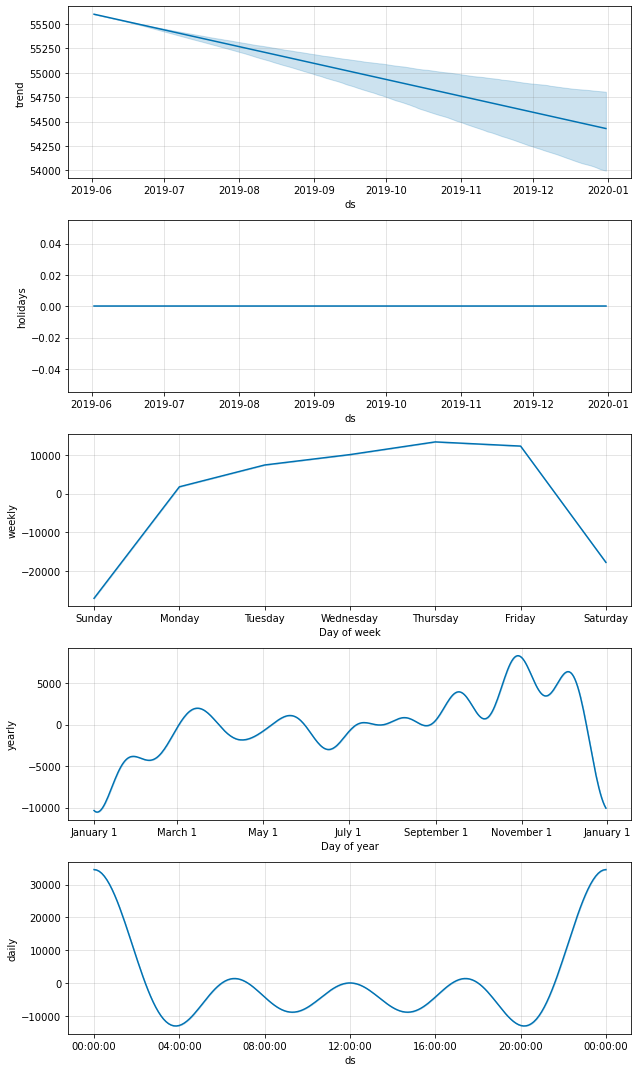

In [419]:
fig2 = m.plot_components(forecast)

<div style="text-align: justify">Podemos concluir que nuestro modelo con mayor variedad de datos no necesariamente representa una mejora en la performance de nuestro modelo , ya que nuestro valor MAPE en nuestro modelo anterior representaba un valor dentro del 9%-10% en error, y en este caso a aumentado hasta un 12%, es por ello que aun cuando hay mayor cantidad de valores y variedad, no significan por ello un modelo que generalice mejor.
    

<div style="text-align: justify">Cabe mencionar que este modelo no tiene una mejor performance que el anterior y en parte se puede deber a que en este modelo no hicimos optimización de hiperparametros, sin embargo a pesar de ello , si tenemos en cuenta que nuestro primer modelo utilizado en el proyecto anterior tampoco se entrenó con hiperparametros obteniendo resultados muy similares, sin embargo para tener mayor cantidad de datos se esperaria que el resultado fuera mejor, desafortunadamente esto no se logra, por ende concluimos lo ya mencionado anteriormente.


<div style="text-align: center"><font align='/center;' color='dark' face='arial' size=5> RED NEURONAL.</font>

Para el siguiente ejercicio procederemos a entrenar un modelo de red neuronal, para ello procederemos a usar una red neuronal tipo LSTM, ya que al hacer una investigación de como usar un modelo de este tipo, vimos que estos modelos se comportan mejor para este tipo de ejercicios de series temporales.

<div style="text-align: justify">El motivo de la implementación de una red neuronal es ver la capacidad de la misma, asi como los costos computacionales y la conveniencia de usarla en este tipo de problemas con datos no tan grandes, no obstante que es importante recalcar que la hipotesis y expectativas es que este algoritmo nos arroje resultados más prometedores que los algoritmos utilizados hasta el momento, esto es por la fuerte creencia de que una red neuronal es de los algoritmos más avanzados que se tienen hasta el día de hoy para hacer predicciones más certeras.

<div style="text-align: justify">Cabe recalcar que la red neuronal que se utilizara es de tipo LSTM, esto es debido a sus propiedades de aprendizaje de la misma, la cual nos permite tener recordar datos pasados y esto aporta mucho al tipo de problema que es, en este caso la serie temporal siempre se enriquecerá de valores similiares con patrones similares, es por ello que la red LSTM es la idónea para este tipo de problemas

<div style="text-align: justify">Por motivos diversos, en este caso se entrenará el modelo univariable, es decir con solo la variable cantidad de pasos, tal como se entrenó en el modelo seleccionado del proyecto anterior.

In [420]:
d=entrenamiento_red_neuronal.copy()
d

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
80,2019,2019-01-01,1,2,Martes,Illia,Centro,Liviano,EFECTIVO,537
86,2019,2019-01-01,1,2,Martes,Illia,Centro,Pesado,EFECTIVO,1
88,2019,2019-01-01,1,2,Martes,Illia,Provincia,Liviano,EFECTIVO,443
94,2019,2019-01-01,1,2,Martes,Illia,Provincia,Pesado,EFECTIVO,1
149,2019,2019-01-01,2,3,Martes,Illia,Centro,Liviano,EFECTIVO,769
...,...,...,...,...,...,...,...,...,...,...
1372316,2017,2017-12-31,21,22,Domingo,Illia,Provincia,Pesado,EFECTIVO,8
1372319,2017,2017-12-31,22,23,Domingo,Illia,Provincia,Liviano,EFECTIVO,8
1372320,2017,2017-12-31,22,23,Domingo,Illia,Provincia,Liviano,EFECTIVO,148
1372324,2017,2017-12-31,22,23,Domingo,Illia,Provincia,Pesado,EFECTIVO,1


In [421]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
d['fecha2'] = pd.to_datetime(d.fecha) + pd.to_timedelta(d.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
d.drop(columns=['fecha','hora_fin'], inplace = True)

d.head()

,periodo,hora_inicio,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha2
80,2019,1,Martes,Illia,Centro,Liviano,EFECTIVO,537,2019-01-01 02:00:00
86,2019,1,Martes,Illia,Centro,Pesado,EFECTIVO,1,2019-01-01 02:00:00
88,2019,1,Martes,Illia,Provincia,Liviano,EFECTIVO,443,2019-01-01 02:00:00
94,2019,1,Martes,Illia,Provincia,Pesado,EFECTIVO,1,2019-01-01 02:00:00
149,2019,2,Martes,Illia,Centro,Liviano,EFECTIVO,769,2019-01-01 03:00:00


In [422]:
d.rename(columns = {'fecha2':'fecha'}, inplace = True) 
d.head()

,periodo,hora_inicio,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
80,2019,1,Martes,Illia,Centro,Liviano,EFECTIVO,537,2019-01-01 02:00:00
86,2019,1,Martes,Illia,Centro,Pesado,EFECTIVO,1,2019-01-01 02:00:00
88,2019,1,Martes,Illia,Provincia,Liviano,EFECTIVO,443,2019-01-01 02:00:00
94,2019,1,Martes,Illia,Provincia,Pesado,EFECTIVO,1,2019-01-01 02:00:00
149,2019,2,Martes,Illia,Centro,Liviano,EFECTIVO,769,2019-01-01 03:00:00


In [423]:
d=d.resample('D', on='fecha').sum()
d
d.describe()

,periodo,hora_inicio,cantidad_pasos
count,1095.000000,1095.000000,1095.000000
mean,440153.474886,2575.147945,43712.859361
std,183307.022589,1092.983551,8192.736927
min,0.000000,0.000000,0.000000
25%,193824.000000,1104.000000,39061.500000
50%,546878.000000,3202.000000,43761.000000
75%,582913.000000,3429.000000,49498.000000
max,669644.000000,3939.000000,63127.000000


Tambien aplicamos técnica de rango intercuartil para ver si con ello tiende a ser mejor que nuestro modelo benchmark.

In [424]:
#features=['cantidad_pasos', 'T_TELEPASE']

for i, caracteristicas in enumerate(['cantidad_pasos']):
    q25,q75 = np.nanpercentile(d[caracteristicas], [25,75])
    iqr = q75 - q25
    minimo = q25 - 1.5*iqr
    maximo = q75 + 1.5*iqr
    
    mascara_outliers = ((d[caracteristicas] < minimo) | (d[caracteristicas]> maximo))
    d[mascara_outliers]=np.NaN
    
d.cantidad_pasos=d.cantidad_pasos.interpolate()
d

,periodo,hora_inicio,cantidad_pasos
fecha,,,
2017-01-01,465927.0,3033.0,31183.0
2017-01-02,637372.0,3709.0,51568.0
2017-01-03,619219.0,3602.0,51093.0
2017-01-04,647457.0,3828.0,53332.0
2017-01-05,641406.0,3790.0,56486.0
...,...,...,...
2019-12-27,193824.0,1104.0,40182.0
2019-12-28,193824.0,1104.0,30681.0
2019-12-29,193824.0,1104.0,26259.0


Visualizamos nuestra gráfica como se comporta nuestros datos despues de aplicar eliminación por rango intercuartil y a su vez interpolación de valores nan

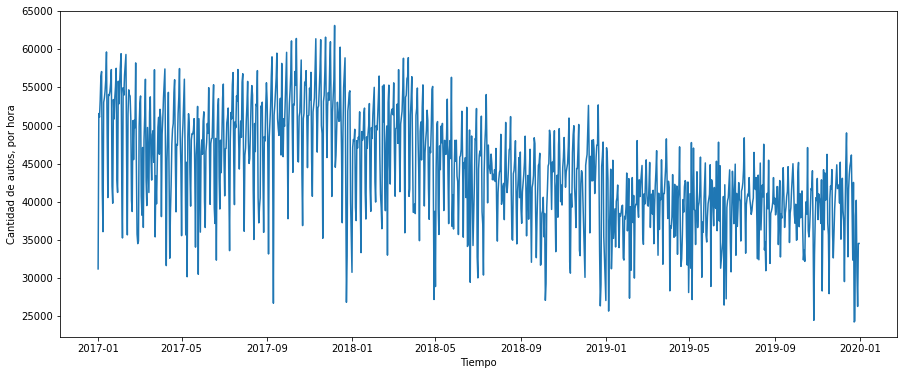

In [425]:
plt.figure(figsize = (15,6))
plt.plot(d.index, d.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

Para entrenar nuestra Red Neuronal procederemos a hacer un reescalado de nuestros datos.

In [426]:
l=pd.DataFrame(d['cantidad_pasos'])
l

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-02,51568.0
2017-01-03,51093.0
2017-01-04,53332.0
2017-01-05,56486.0
...,...
2019-12-27,40182.0
2019-12-28,30681.0
2019-12-29,26259.0


In [427]:
from sklearn.preprocessing import MinMaxScaler
diario_r=l.loc[:,'cantidad_pasos']
diario_r=pd.DataFrame(l)
scaler = MinMaxScaler(feature_range=(0, 1))
diario_r['cantidad_pasos_r'] = scaler.fit_transform(l)
diario_r
r=diario_r.copy()
r

,cantidad_pasos,cantidad_pasos_r
fecha,,
2017-01-01,31183.0,0.178965
2017-01-02,51568.0,0.702907
2017-01-03,51093.0,0.690698
2017-01-04,53332.0,0.748246
2017-01-05,56486.0,0.829311
...,...,...
2019-12-27,40182.0,0.410260
2019-12-28,30681.0,0.166063
2019-12-29,26259.0,0.052407


In [428]:
senial=diario_r.cantidad_pasos_r
senial

fecha
2017-01-01    0.178965
2017-01-02    0.702907
2017-01-03    0.690698
2017-01-04    0.748246
2017-01-05    0.829311
                ...   
2019-12-27    0.410260
2019-12-28    0.166063
2019-12-29    0.052407
2019-12-30    0.264811
2019-12-31    0.264811
Freq: D, Name: cantidad_pasos_r, Length: 1095, dtype: float64

In [429]:
#Utilizaremos una ventana de 6 meses
look_back = 180
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)


for i in range(X.shape[0]):
    #X[i,:] = senial.values.iloc[i:i+look_back]
    #y[i] = senial.values.iloc[i+look_back]
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]



N_train = 1034 - look_back # cantidad de instancias que vamos a usar para entrenar, en este caso seran 2 años aproximadamente
N_test = 60 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(854, 180) (854,)
(60, 180) (60,)


In [430]:
X_train=X_train.reshape(854,180,1)
X_test=X_test.reshape(60,180,1)
y_train=y_train.reshape(854,1)
y_test=y_test.reshape(60,1)

Procedemos a entrenar nuestra red neuronal tipo LSTM

In [431]:
model = Sequential()
model.add(LSTM(50,batch_input_shape=(None, 180, 1), stateful=False, return_sequences=True, unroll=True))
model.add(LSTM(70,stateful=False, unroll=True))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))
opt_adam = optimizers.Adam(clipvalue=0.5)
model.compile(loss='mean_squared_error', optimizer=opt_adam)
model.reset_states()
history=model.fit(X_train, y_train.reshape(-1,1), epochs=120, batch_size=64, verbose=1, 
                  shuffle=True,validation_data=(X_test, y_test))

Epoch 1/120
14/14 [==============================] - 29s 2s/step - loss: 0.0970 - val_loss: 0.0224
Epoch 2/120
14/14 [==============================] - 18s 1s/step - loss: 0.0271 - val_loss: 0.0287
Epoch 3/120
14/14 [==============================] - 19s 1s/step - loss: 0.0235 - val_loss: 0.0213
Epoch 4/120
14/14 [==============================] - 19s 1s/step - loss: 0.0224 - val_loss: 0.0241
Epoch 5/120
14/14 [==============================] - 19s 1s/step - loss: 0.0222 - val_loss: 0.0228
Epoch 6/120
14/14 [==============================] - 18s 1s/step - loss: 0.0219 - val_loss: 0.0216
Epoch 7/120
14/14 [==============================] - 18s 1s/step - loss: 0.0220 - val_loss: 0.0218
Epoch 8/120
14/14 [==============================] - 18s 1s/step - loss: 0.0220 - val_loss: 0.0215
Epoch 9/120
14/14 [==============================] - 18s 1s/step - loss: 0.0226 - val_loss: 0.0218
Epoch 10/120
14/14 [==============================] - 19s 1s/step - loss: 0.0222 - val_loss: 0.0232
Epoch 11/

Procedemos a hacer nuestras predicciones.

In [432]:
train_prediction=model.predict(X_train, batch_size=1, verbose=1)
test_prediction=model.predict(X_test, batch_size=1, verbose=1)

60/60 [==============================] - 1s 15ms/step


Reescalamos nuestros datos, para poder hacer un análisis de manera adecuada.

In [433]:
train_Prediction_r = scaler.inverse_transform(train_prediction)
test_Prediction_r = scaler.inverse_transform(test_prediction)
y_train_r=scaler.inverse_transform(y_train)
y_test_r= scaler.inverse_transform(y_test)

In [434]:
l=l.reset_index(level=['fecha'])
l

,fecha,cantidad_pasos,cantidad_pasos_r
0,2017-01-01,31183.0,0.178965
1,2017-01-02,51568.0,0.702907
2,2017-01-03,51093.0,0.690698
3,2017-01-04,53332.0,0.748246
4,2017-01-05,56486.0,0.829311
...,...,...,...
1090,2019-12-27,40182.0,0.410260
1091,2019-12-28,30681.0,0.166063
1092,2019-12-29,26259.0,0.052407
1093,2019-12-30,34523.0,0.264811


Procedemos a rehacer nuestro dataset, tomando en cuenta que tenemos una ventana de 180 días, esto nos lleva a una fecha de predicciones en fecha inicial 30-06-2017

In [435]:
fecha_inicial= pd.date_range('20170630', periods=854, freq='D')
df_train=pd.DataFrame()
df_train['fecha']=fecha_inicial
df_train['y']=train_Prediction_r
df_train.head(-1)

,fecha,y
0,2017-06-30,53033.070312
1,2017-07-01,47340.070312
2,2017-07-02,39367.468750
3,2017-07-03,42759.273438
4,2017-07-04,47330.089844
...,...,...
848,2019-10-26,41755.417969
849,2019-10-27,37128.652344
850,2019-10-28,36292.617188
851,2019-10-29,37643.628906


In [472]:
fecha_inicial_2 = pd.date_range('20191031', periods=60, freq='D')
df_test=pd.DataFrame()
df_test['fecha']=fecha_inicial_2
df_test['y']=test_Prediction_r
df_test.head(5)

,fecha,y
0,2019-10-31,40580.609375
1,2019-11-01,38245.843750
2,2019-11-02,35150.527344
3,2019-11-03,36368.582031
4,2019-11-04,39058.171875


In [437]:
fecha = pd.date_range('20170101', periods=1095, freq='D')
df_original=pd.DataFrame()
df_original['fecha']=fecha
df_original['y']=l.cantidad_pasos.values

df_original.head()


,fecha,y
0,2017-01-01,31183.0
1,2017-01-02,51568.0
2,2017-01-03,51093.0
3,2017-01-04,53332.0
4,2017-01-05,56486.0


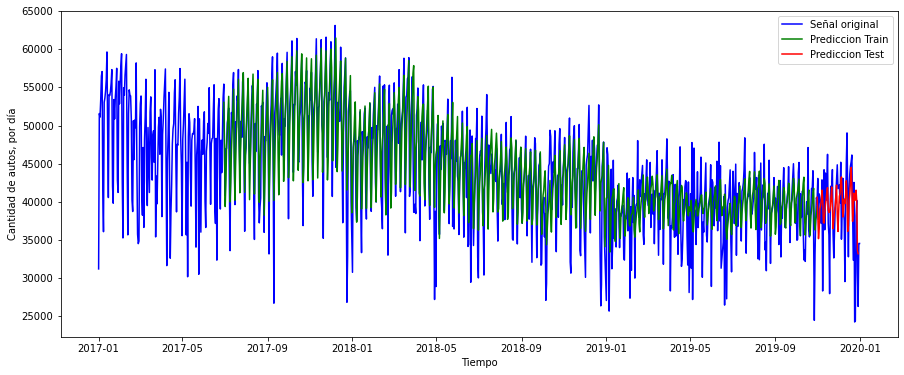

In [474]:
plt.figure(figsize=(15,6))
plt.plot(df_original.fecha,df_original.y,label='Señal original',color='b')
plt.plot(df_train.fecha,df_train.y,label='Prediccion Train',color='green')
plt.plot(df_test.fecha,df_test.y,label='Prediccion Test',color='red')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por día')
plt.show()

A continuación vemos el comportamiento de todo nuestro entrenamiento.

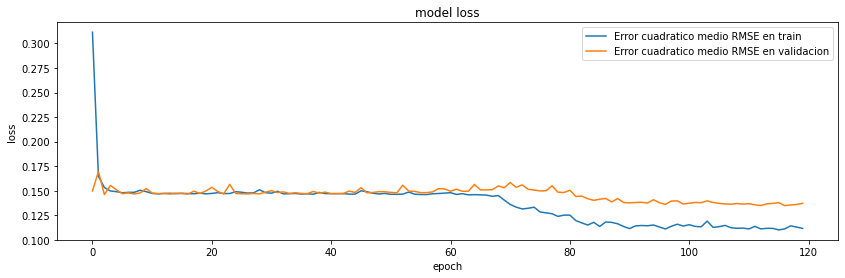

In [439]:
plt.figure(figsize=(14,4))
plt.plot(np.sqrt(history.history['loss']), label='Error cuadratico medio RMSE en train')
plt.plot(np.sqrt(history.history['val_loss']), label='Error cuadratico medio RMSE en validacion')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()


En la gráfica anterior podemos ver que nuestros resultados son sostenidos despues de un epoch de 60.

In [440]:
MSE_train_LSTM = mean_squared_error(scaler.inverse_transform(y_train), train_Prediction_r)
print('Error en Train:',np.sqrt(MSE_train_LSTM))

MSE_test_LSTM = mean_squared_error(scaler.inverse_transform(y_test), test_Prediction_r)
print('Error en Test:',np.sqrt(MSE_test_LSTM))

Error en Train: 4439.07129188805
Error en Test: 5334.897236073639


In [442]:
MAPE_Train=mean_absolute_percentage_error(y_train_r, train_Prediction_r)
MAPE_Test=mean_absolute_percentage_error(y_test_r, test_Prediction_r)


In [443]:
print(f'El error en train es: {MAPE_Train}')
print(f'El error en train es: {MAPE_Test}')

El error en train es: 8.208885928010613
El error en train es: 11.68494244317931


Para hacer una retrospectiva, presentamos aquí los gráficos de los 2 modelos usados en el proyecto anterior, si bien vemos el que mejor performance tiene es el de random forest.

<img src="Resultados_mape.png">

No obstante como detallamos anteriormente el modelo elegido fue el de prophet, esto debido a que en terminos generales tiene mejor generalización en su testeo, a continuación mostramos imagen de los resultados en nuestro modelo elegido.

<img src="MAPE PROPHET.png">

A continuación mostramos nuestros resultados obtenidos en nuestra red neuronal.

El error en train es: 8.208885928010613
El error en train es: 11.68494244317931


<Figure size 864x576 with 0 Axes>

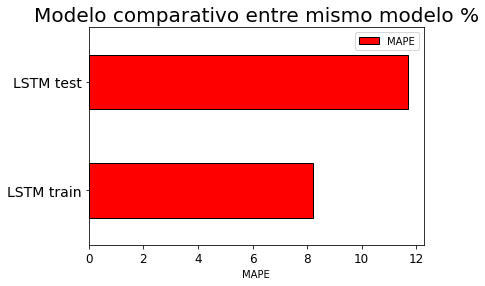

In [444]:
fig=plt.figure(figsize=(12,8))

model_comparison = pd.DataFrame({'model': ['LSTM train','LSTM test',
                                                                            ],
                                 'MAPE': [MAPE_Train,MAPE_Test, 
                                         ]})

model_comparison.sort_values('MAPE', ascending = True).plot(x = 'model', y = 'MAPE', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('MAPE'); plt.xticks(size = 12)
plt.title('Modelo comparativo entre mismo modelo %', size = 20);

fig.autofmt_xdate()
fig.autofmt_xdate()
fig.tight_layout()

print(f'El error en train es: {MAPE_Train}')
print(f'El error en train es: {MAPE_Test}')

Comparando las gráficas anteriores, podemos ver que nuestro modelo no mejora los resultados obtenidos en el paso anterior, a continuación detallaré conclusiones punto por punto.

<div style="text-align: center"><font align='/center;' color='dark' face='arial' size=5> CONCLUSIONES GENERALES.</font>

<div style="text-align: justify">Como pudimos ver a lo largo del proyecto desde la exploración de datos pudimos responder algunas dudas surgidas anteriormente, y aunque anteriormente una de ellas no fue debidamente resulta, en esta parte llegamos a una conclusión concreta.

<div style="text-align: justify">Para recapitular, pudimos concluir que en nuestra autopista de illia las 2 formas de pago más utilizadas son Telepase y Efectivo, y aunque a lo largo del tiempo el efectivo ha sido predominante en nuestra economía, en este caso en particular podemos darnos cuenta de cuan importante son los medios digitales, si bien sin llegar a una conclusión si esta bien o mal, podemos ver que las tecnologías y los avances han permitido que las formas de pago digitales o de tarjetas vayan al alza, tambien podemos rescatar de esto que aun cuando en un ejercicio anterior pareceria que nuestra autopista de estudio tenía una tendencia a la baja, lo que no estabamos viendo completamente es el hecho de que el efectivo genera ese efecto, no sucediendo lo mismo con telepase que sigue una tendencia similar a la cantidad total de autos que pasan tomando en cuenta todas las formas de pago.
    
<div style="text-align: justify">Por otro lado como sucede en mayoría de ciudades, podemos concluir que el día más transitado con un pico elevado es el día jueves, sin embargo es importante mencionar que la tendencia alcista comienza los días lunes, con pico máximo el día jueves, los viernes se ve un decrecimiento importante cerrando con una baja importante los fines de semana, podría creerse o erróneamente pensar que los días con mayor flujo son los fines de semana dado la necesidad de esparcimiento y descanso de la población, sin embargo es notorio cuanta cantidad de autos mueven las escuelas, trabajos y la vida diaria.
    
<div style="text-align: justify"> Una vez pasado al entrenamiento de modelos podemos analizar que no por mayor cantidad de información y variedad eso significa una mejora importante en el performance del modelo y para ello se demuestra en el entrenamiento de nuestro modelo benchmark, el cual se entrenó con las 2 formas de pago más importantes y con una mayor cantidad de datos, si bien no empeoró de manera signficativa, si podriamos decir que mayores datos no siempre significan un modelo más poderoso, sin embargo es de gran importancia mencionar que los resultados obtenidos en el modelo benchmark son los que se deberían tomar como datos base para un modelo predictivo de la vida real, esto debido a que estos valores representan la verdadera tendencia del flujo vehicular de la autopista, no sucede lo mismo con los datos filtrados por forma de pago efectivo, podemos decir que tiene mejor performance, pero si tomamos valores reales sus resultados pueden ser muy pobres,por ello es importante hacer mención de esto , ya que si se requiere trabajar con un algoritmo que tenga la capacidad de predecir el flujo real de la autopista, el estudiado en este capítulo puede ser mejor que el anterior. No debemos olvidar que este modelo dada la naturaleza del proyecto solo fue entrenado con valores default sin llegar a una optimización más profunda y el cúal nos podría haber llevado a mejores resultados.
    
<div style="text-align: justify"> Pasando al último punto pero no menos importante, empezaré comentando que el modelo entrenado fue haciendo comparación con nuestra forma de pago efectivo, por lo cual limitaré a hacer un análisis justo comparandolo con los resultados del modelo anterior.
<div style="text-align: justify"> Si comparamos los resultados obtenidos entre nuestros 2 modelos, el benchmark y el modelo a competir, podemos concluir que nuestro modelo PROPHET tiene una mejor performance, tanto en resultado como en términos de generalización, sin embargo podemos rescatar del uso de nuestra red neuronal que debido a la amplitud del tema y la poca experiencia personal en el mismo no podemos concluir que hicimos una amplia optimización del modelo y eso podría influir en el uso del mismo, sin embargo para tener una visión más clara, lo que tenemos que reconocer es el tiempo computacional entre uno y otro modelo, si bien aún con la poca optimización del mismo logramos resultados muy similares y cercanos esto no se logró en el mismo costo computacional ya que en eso nuestro modelo prophet tiene un mejor tiempo de entremiento y eso importa mucho desde las herramientas usadas, es por ello que a pesar de que nuestra red neuronal no se le hizó una exhaustiva optimización de hiperparametros podemos determinar que para el tipo de problema dado, nuestro modelo prophet tiende a ser mejor, muy posiblemente ante un mayor escalamiento de datos e información nuestra red neuronal sea la ganadora.
    
<div style="text-align: justify">Para finalizar y como conclusiones generales, podemos resaltar la importancia de filtrar datos, hacer limpieza y sobre todo graficar correctamente para tener conclusiones más concisas, támbien no se debe dejar de mencionar que un modelo no siempre es mejor a otro por el hecho del nivel tecnológico por el cual fue creado, ya que se deja ver claro que aunque una red neuronal que es un algoritmo muy poderoso, en este particular problema no pudo ser mejor que un algoritmo con menos tecnología, sin embargo con esto no queremos decir que las redes neuronales sean solo usadas para casos muy específicos, lo que  quiero decir que aunado al factor de la inexperiencia personal y el hecho del costo computacional es claro que nuestro modelo prophet nos dio mejores resultados a 1/4 del costo computacional. 